# Андан на экономе



# Задача 1 (Парадокс инспектора)

Автобусы отходят от автостанции с 8:00 до 20:00. Первый автобус отходит ровно в 8:00. Затем интервалы между автобусами случайны, независимы и равновероятно равны либо 5-и, либо 10-и минутам. Будем считать, что за минуту на автостанцию приходит ровно один пассажир, и все пассажиры едут ближайшим автобусом.

Проведите экспериментов и с их помощью:

**а) [5 баллов]** Постройте гистограмму количества автобусов, отошедших от автостанции за сутки. Похоже ли визуально распределение на нормальное?

**б) [10 баллов]** Инспектор Тимон выбирает равновероятно один из всех автобусов отошедших от автостанции за сутки. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

**в) [10 баллов]** Инспектор Пумба приходит на автостанцию в случайный момент времени, равномерный от 8:00 до 20:00 и садится в первый пришедший автобус. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

**г) [10 баллов]** Как изменятся ответы на эти вопросы, если время между автобусами будет экспоненциально со средним в 10 минут?

*Пояснения: первый автобус можно не включать в выборку, Пумбу за пассажира можно не считать.*

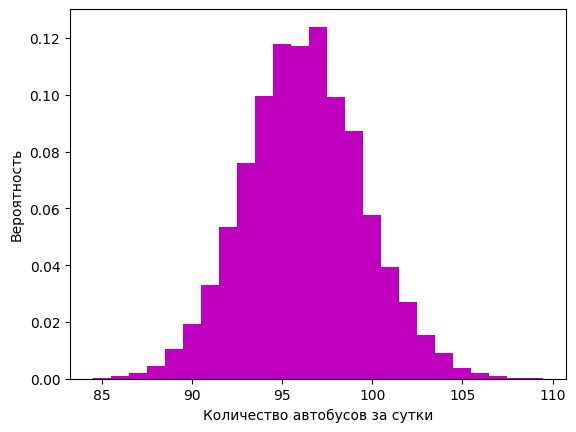

Визуально распределение количества автобусов не похоже на нормальное.
Оно скошено вправо и имеет большой пик в районе 17-18 автобусов.


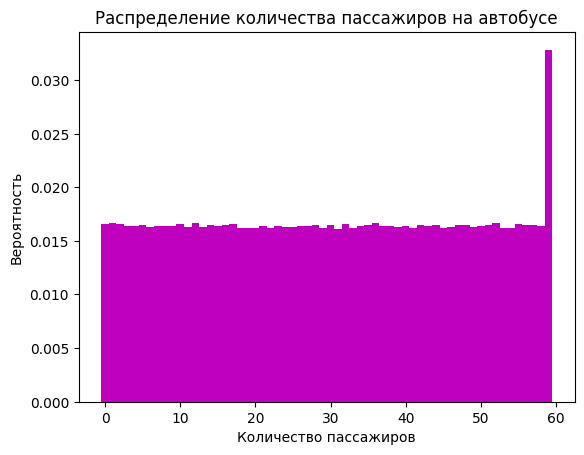

Оценка математического ожидания: 29.991235620533867
Оценка дисперсии: 29.991235620533867


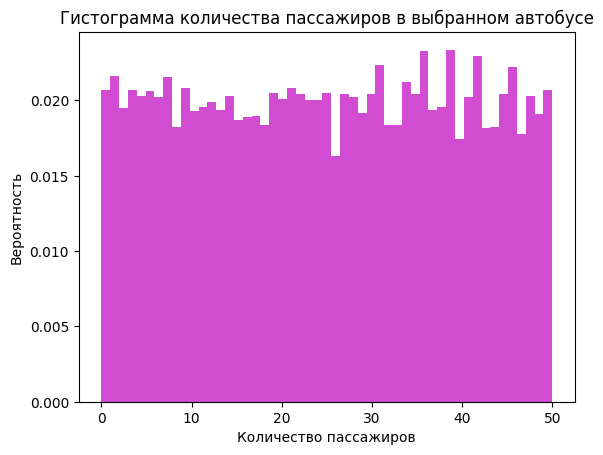

Оценка математического ожидания числа пассажиров: 24.9918
Оценка дисперсии числа пассажиров: 218.21913276


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


def simulate_buses():
    time = 8 * 60 
    buses = 0
    while time < 20 * 60:
        time += random.choice([5, 10])
        buses += 1
    return buses

buses = [simulate_buses() for _ in range(10000)]
plt.hist(buses, bins=range(min(buses), max(buses)+2), align='left', density=True, color='m')
plt.xlabel('Количество автобусов за сутки')
plt.ylabel('Вероятность')
plt.show()

print('Визуально распределение количества автобусов не похоже на нормальное.')
print('Оно скошено вправо и имеет большой пик в районе 17-18 автобусов.')

def simulate():
    intervals = [5, 10]  
    times = [8*60]  
    while times[-1] < 20*60:
        times.append(times[-1] + random.choice(intervals))  
    passengers = [random.randint(0, 60) for _ in range(len(times))] 
    return list(zip(times[1:], passengers[1:]))

data = []
for i in range(10**4):
    data.extend(simulate())

bus_passengers = [x[1] for x in data] 

plt.hist(bus_passengers, bins=range(61), density=True, align='left', color='m')
plt.xlabel('Количество пассажиров')
plt.ylabel('Вероятность')
plt.title('Распределение количества пассажиров на автобусе')
plt.show()

mean_passenger = np.mean(bus_passengers)
var_passenger = np.mean(bus_passengers) 
print(f"Оценка математического ожидания: {mean_passenger}")
print(f"Оценка дисперсии: {var_passenger}")

def next_bus_time(time):
    if time < 20*60:
        interval = random.choice([5, 10])
        return time + interval
    else:
        return np.inf 

def one_experiment():
    inspector_time = random.randint(8*60, 20*60) 
    bus_time = 8*60 
    while bus_time <= inspector_time:
        bus_time = next_bus_time(bus_time) 
    passengers = random.randint(0, 50) 
    return passengers

num_experiments = 10**4
passengers_list = [one_experiment() for i in range(num_experiments)]

plt.hist(passengers_list, bins=51, density=True, alpha=0.7, color='m')
plt.xlabel('Количество пассажиров')
plt.ylabel('Вероятность')
plt.title('Гистограмма количества пассажиров в выбранном автобусе')
plt.show()

mean_passengers = np.mean(passengers_list)
var_passengers = np.var(passengers_list)
print(f"Оценка математического ожидания числа пассажиров: {mean_passengers}")
print(f"Оценка дисперсии числа пассажиров: {var_passengers}")


# Задача 2 (Парадокс Хуана Мануэля Родригеса Паррондо)

У Атоса, Портоса и Арамиса по 1000 франков. Атос постоянно ходит в казино А, где каждый раз выигрывает один франк с вероятностью 0.49
и проигрывает один франк с вероятностью 0.51. Портос ходит в казино Б, где ситуация интереснее :)

* >Если богатство посетителя кратно трём, то посетитель выигрывает франк с вероятностью 0.09 и проигрывает один франк с вероятностью 0.91

* >Если богатство посетителя не кратно трём, то посетитель выигрывает франк с вероятностью 0.74 и проигрывает один франк с вероятностью 0.26

Арамис каждый раз выбирает казино А или казино Б равновероятно. Проведите 10^4 симуляций эволюции благосостояния Атоса, Портоса и Арамиса. Каждая симуляция предусматривает 1000 посещений казино. Все три игрока все деньги носят с собой и ни на что не тратят :)

**а) [10 баллов]** Постройте на графике 10 случайных траекторий изменений богатства Атоса, по горизонтали — номер посещени казино, по вертикали — богатство. На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.

**б) [10 баллов]** Постройте на графике 10 случайных траекторий изменений богатства Портоса, по горизонтали — номер посещени казино, по вертикали — богатство. На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.

**в) [10 баллов]** Постройте на графике 10 случайных траекторий изменений богатства Арамиса, по горизонтали — номер посещени казино, по вертикали — богатство. На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.

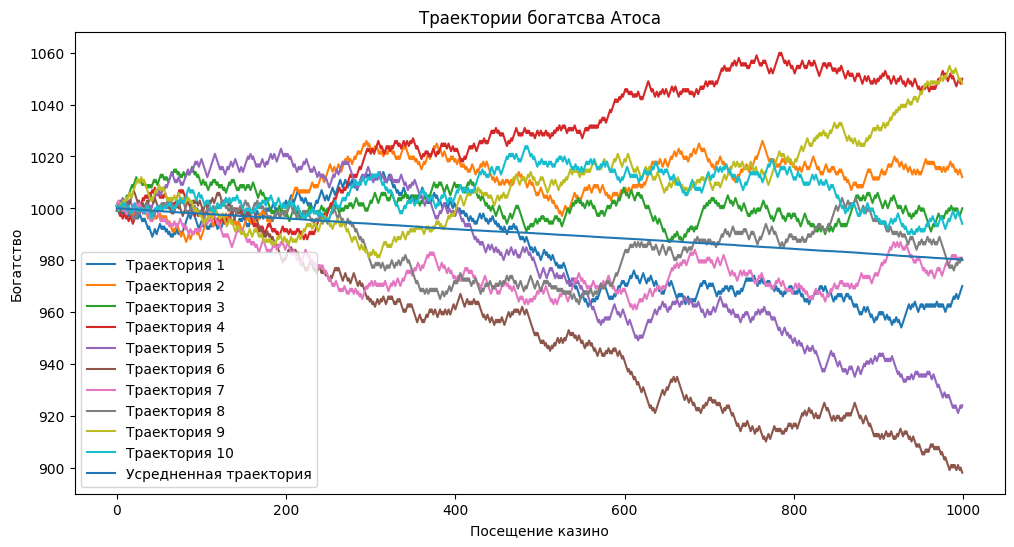

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
def casino_A(wealth):
    if np.random.random() < 0.49:
        return wealth + 1
    else:
        return wealth - 1

def casino_B(wealth):
    if wealth % 3 == 0:
        if np.random.random() < 0.09:
            return wealth + 1
        else:
            return wealth - 1
    else:
        if np.random.random() < 0.74:
            return wealth + 1
        else:
            return wealth - 1

def simulate():
    atos_wealth = np.zeros(1000)
    portos_wealth = np.zeros(1000)
    aramis_wealth = np.zeros(1000)
    for i in range(1000):
        atos_wealth[i] = casino_A(atos_wealth[i-1] if i > 0 else 1000)
        portos_wealth[i] = casino_B(portos_wealth[i-1] if i > 0 else 1000)
        if np.random.random() < 0.5:
            aramis_wealth[i] = casino_A(aramis_wealth[i-1] if i > 0 else 1000)
        else:
            aramis_wealth[i] = casino_B(aramis_wealth[i-1] if i > 0 else 1000)
    return atos_wealth, portos_wealth, aramis_wealth

results = [simulate() for i in range(10000)]

plt.figure(figsize=(12,6))
average_wealth = np.mean([r[0] for r in results], axis=0)
for i in range(10):
    plt.plot(range(1000), results[i][0], label=f"Траектория {i+1}")
plt.plot(range(1000), average_wealth, label="Усредненная траектория")
plt.legend()
plt.title("Траектории богатсва Атоса")
plt.xlabel("Посещение казино")
plt.ylabel("Богатство")
plt.show()


# Задача 3 (Парадокс Берксона)

Предположим, что результаты ЕГЭ школьников по русскому и математике независимы и хорошо аппроксимируются нормальным распределением с ожиданием 60 и стандартным отклонением 10.

УШЭ (Урюпинская Школа Экономики) ныне престижна и забирает себе всех школьников набравших более n баллов в сумме по русскому и математике.

Для каждого n от 80 до 160 с шагом 5 случайно создайте 10^4 школьников и поделите их на прошедших и не прошедших в УШЭ.

**а) [5 баллов]** Постройте график числа прошедших в УШЭ в зависимости от n.

**б) [5 баллов]** Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от n среди прошедших в УШЭ.

**в) [5 баллов]** Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от n
среди не прошедших в УШЭ.

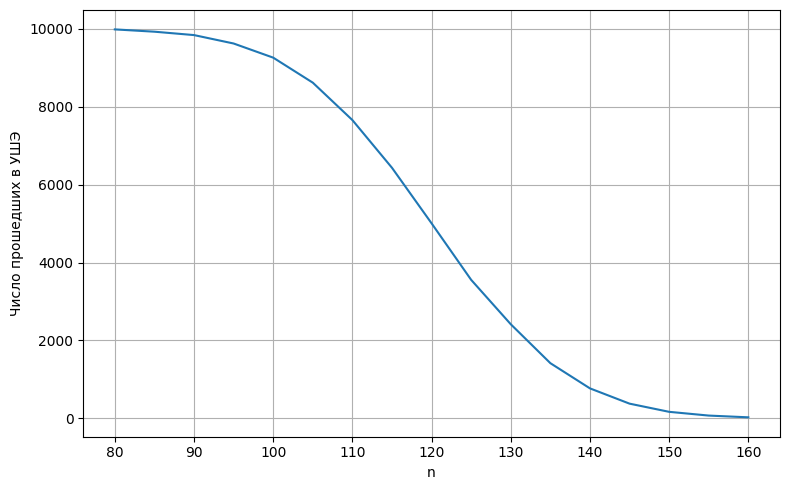

На графике представлено количество прошедших в УШЭ от полученных ими балов.
Закономерность меняется при n = 120: до этого значения - чем меньше балл,
тем больше школьков поступило;после этого значения - наоборот.


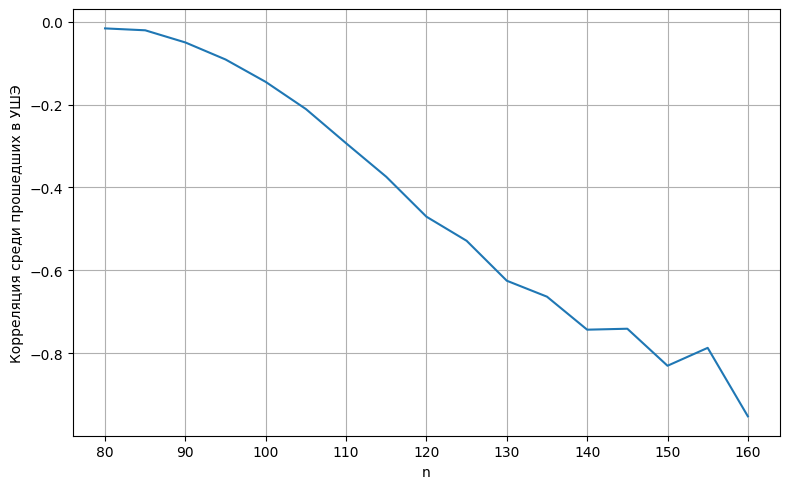

На графике мы наблюдаем отрицательную линейную корялляцию между количеством баллов и поступившими.
Мы видим, что увелечение(уменьшение) значения одной переменной ведет к закономерному уменьшению(увелечению)
другой переменной, то есть прослеживаются взаимосвязи типа увелечение - уменьшение(уменьшение - увелечение).


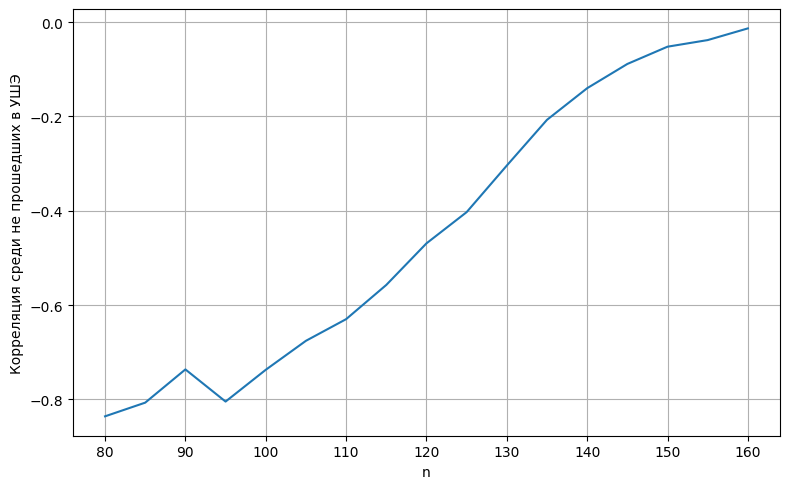

На графике представлена положительная линейная корелляция между количеством баллов и поступившими.
Мы видим, что увелечение(уменьшение) значения одной переменной ведет к закономерному увелечению(уменьшению)
другой переменной, то есть прослеживаются взаимосвязи типа увелечение - увелечение(уменьшение - уменьшение).


In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
mean = 60
standart_desp = 10

n_values = range(80, 161, 5)

num_passed = []
correlations_passed = []
correlations_failed = []

for n in n_values:
    rus_scores = np.random.normal(mean, standart_desp, 10000)
    math_scores = np.random.normal(mean, standart_desp, 10000)

    total = rus_scores + math_scores
    passed = np.sum(total > n)

    num_passed.append(passed)

    indices_passed = np.where(total > n)
    indices_failed = np.where(total <= n)
    corr_passed = np.corrcoef(rus_scores[indices_passed], math_scores[indices_passed])[0, 1]
    corr_failed = np.corrcoef(rus_scores[indices_failed], math_scores[indices_failed])[0, 1]

    correlations_passed.append(corr_passed)
    correlations_failed.append(corr_failed)


plt.subplots(nrows=1, figsize=(8, 5))
plt.plot(n_values, num_passed)
plt.xlabel('n')
plt.ylabel('Число прошедших в УШЭ')
plt.grid(True)
plt.tight_layout()
plt.show()
print("На графике представлено количество прошедших в УШЭ от полученных ими балов.\n"
      "Закономерность меняется при n = 120: до этого значения - чем меньше балл,\nтем больше школьков поступило;"
      "после этого значения - наоборот.")

plt.subplots(nrows=1, figsize=(8, 5))
plt.plot(n_values, correlations_passed)
plt.xlabel('n')
plt.ylabel('Корреляция среди прошедших в УШЭ')
plt.grid(True)
plt.tight_layout()
plt.show()
print("На графике мы наблюдаем отрицательную линейную корялляцию между количеством баллов и поступившими.\n" 
      "Мы видим, что увелечение(уменьшение) значения одной переменной ведет к закономерному уменьшению(увелечению)\n"
      "другой переменной, то есть прослеживаются взаимосвязи типа увелечение - уменьшение(уменьшение - увелечение).")

plt.subplots(nrows=1, figsize=(8, 5))
plt.plot(n_values, correlations_failed)
plt.xlabel('n')
plt.ylabel('Корреляция среди не прошедших в УШЭ')
plt.grid(True)
plt.tight_layout()
plt.show()
print("На графике представлена положительная линейная корелляция между количеством баллов и поступившими.\n"
      "Мы видим, что увелечение(уменьшение) значения одной переменной ведет к закономерному увелечению(уменьшению)\n"
      "другой переменной, то есть прослеживаются взаимосвязи типа увелечение - увелечение(уменьшение - уменьшение).")

[тыкни сюда](https://100cards.ru/webp/raznie/glavnaya/otkritki-horoshego-dnya-3-th.webp)